<a href="https://colab.research.google.com/github/renatamontanhana/-KNN_Caso_pratico_dano_veicular/blob/main/M5A24_KNN_Caso_Pr%C3%A1tico_dano_veicular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='BLUE'>Cientista de Dados na Prática </font>

# <font color='Purple'>Módulo 5 - Máquinas Preditivas</font>

### <font color='GREY'> KNN - Vizinho mais Próximo </font>  


### <font color='Black'> **Caso Prático 1** </font>



#1° Problema de Negócio

Nesse caso prático, nós precisamos construir um classificador que avalia o Dano veicular por meio do algoritmo KNN.


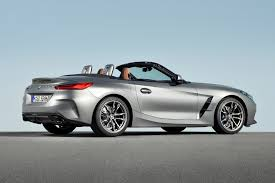

# 2° Análise Exploratória dos Dados


In [1]:
# Importando Bibliotecas de Visualização
import ipywidgets as widgets
from IPython.display import display

style = {'Descrição_Variáveis': 'initial'}

In [2]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
#Importing dataset - Fonte de Dados
file_name = '/content/dano.csv'

dataset = pd.read_csv(file_name, delimiter=';')

dataset.head()

,ID_Veicular,Laterais,Dianteira,Traseira,Teto,Dano_Veicular
0,0,5.1,3.5,1.4,0.2,Dano-Alto
1,1,4.9,3.0,1.4,0.2,Dano-Alto
2,2,4.7,3.2,1.3,0.2,Dano-Alto
3,3,4.6,3.1,1.5,0.2,Dano-Alto
4,4,5.0,3.6,1.4,0.2,Dano-Alto


In [4]:
print(f"Esse Dataset tem {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.")

Esse Dataset tem 150 linhas e 6 colunas.


In [5]:
#Gráfico de Visualização dos dados
wig_col = widgets.Dropdown(
                options=[col for col in dataset.columns.tolist() if col.startswith(('Laterais', 'Dianteira','Traseira','Teto'))],
                description='Choose a Column to Plot vs. Attributes',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

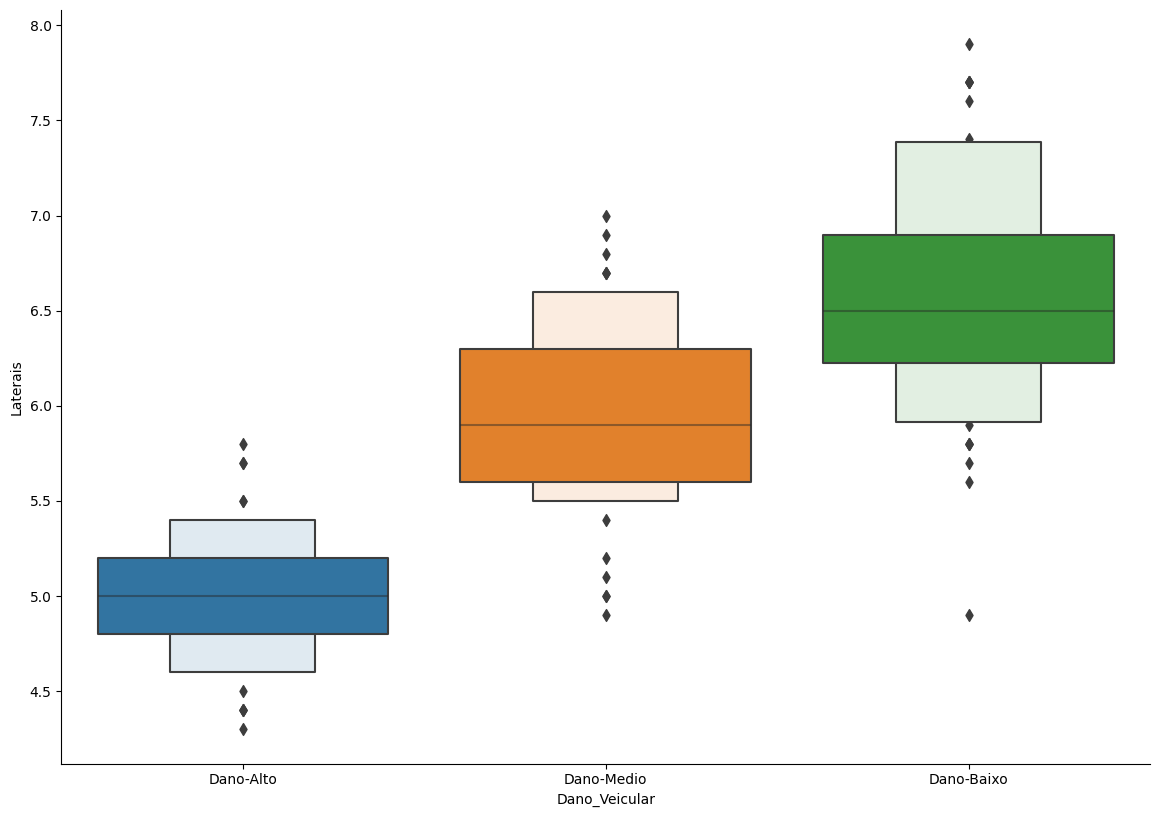

In [6]:
display(wig_col)

sns.catplot(x="Dano_Veicular", y=wig_col.value, kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

# 3° Pré-Processamento dos Dados

In [7]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = dataset.iloc[:,:-1].values  #variáveis independentes
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [8]:
print("\nVariáveis de Entrada da avaliação:\n\n", X[:5])
print("\nResultado do Dano :\n\n", y[:5])


Variáveis de Entrada da avaliação:

 [[0.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [2.  4.7 3.2 1.3 0.2]
 [3.  4.6 3.1 1.5 0.2]
 [4.  5.  3.6 1.4 0.2]]

Resultado do Dano :

 ['Dano-Alto' 'Dano-Alto' 'Dano-Alto' 'Dano-Alto' 'Dano-Alto']


## Encode Classes

- Transformando o Target em variável numérica para melhorar a performance do algoritmo

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['Dano_Veicular'] = labelencoder.fit_transform(dataset['Dano_Veicular'])

In [10]:
dataset['Dano_Veicular'].unique()

array([0, 2, 1])

### Separando os dados entre Treino e Teste de forma interativa

In [11]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [12]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 7)

In [13]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[126.    6.2   2.8   4.8   1.8]
 [ 79.    5.7   2.6   3.5   1. ]]
y = 
 ['Dano-Baixo' 'Dano-Medio']


Dados de Teste :
----------------

X = 
 [[149.    5.9   3.    5.1   1.8]
 [ 84.    5.4   3.    4.5   1.5]]
y = 
 ['Dano-Baixo' 'Dano-Medio']


In [14]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 5)
Shape dos dados de teste é (30, 5)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [15]:
dataset.describe()

,ID_Veicular,Laterais,Dianteira,Traseira,Teto,Dano_Veicular
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("\n-------------------------\nDataset depois da padronização:\n-------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


-------------------------
Dataset depois da padronização:
-------------------------


X_train :
 [[ 1.20732325  0.43325894 -0.59653573  0.62601116  0.82081788]
 [ 0.14948526 -0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.13342464 -1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.49991673  1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.03694931  0.669582   -0.36636117  0.34778398  0.17365529]]
-------------------------

X_test :
 [[ 1.72498864  0.07877435 -0.13618661  0.79294747  0.82081788]
 [ 0.26202122 -0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.72829519 -0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.14310822 -0.27571024 -0.13618661  0.45907485  0.43252033]
 [ 0.75717942 -1.10284094 -1.28705941  0.45907485  0.69138537]]


# 4° Construindo a Máquina Preditiva com o KNN Classifier

In [17]:
# import KNN library
from sklearn.neighbors import KNeighborsClassifier

# configure params for the model.
neigh_wig = widgets.Dropdown(options=[1, 10, 30, 100],
                             description="Number of Neighbours = ", style=style)

display(neigh_wig)

Dropdown(description='Number of Neighbours = ', options=(1, 10, 30, 100), value=1)

### Treinando a Máquina Preditiva

In [18]:
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=neigh_wig.value)

#Feed the training data to the classifier
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)

#Predicting the species for test set
y_pred = Maquina_Preditiva.predict(X_test)

print("\n---------------------------\n")
print("Valores Preditos com dados de Teste :\n",y_pred)
print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)



---------------------------

Valores Preditos com dados de Teste :
 ['Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo' 'Dano-Alto' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo'
 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo']

---------------------------

Valores Reais com dados de teste :
 ['Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio' 'Dano-Baixo'
 'Dano-Alto' 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo' 'Dano-Alto' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo'
 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo']


#5° Avaliando a Máquina Preditiva

In [19]:
#8 Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred))



Acurácia da Máquina =  0.9


In [20]:
#9 Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df


Real vs Predito 
------------------------------



,Real,Predito
0,Dano-Baixo,Dano-Baixo
1,Dano-Medio,Dano-Medio
2,Dano-Alto,Dano-Alto
3,Dano-Medio,Dano-Medio
4,Dano-Baixo,Dano-Medio
5,Dano-Alto,Dano-Medio
6,Dano-Medio,Dano-Medio
7,Dano-Medio,Dano-Medio
8,Dano-Alto,Dano-Alto
9,Dano-Medio,Dano-Medio


### Real vs. Predito

In [21]:
#Usando a confusion matrix para avaliar a acurácia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[ 6  0  1]
 [ 0  9  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

   Dano-Alto       1.00      0.86      0.92         7
  Dano-Baixo       1.00      0.82      0.90        11
  Dano-Medio       0.80      1.00      0.89        12

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.90        30
weighted avg       0.92      0.90      0.90        30



# Fim

## Valeu!

### #Instagram - Ciencia dos Dados <a href="http://instagram.com/cienciadosdados">instagram.com/cienciadosdados</a>